In [1]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SQLContext
import json
from pyspark.sql.functions import mean, min, max
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Introdução 
Spark
banco de dados

https://www.kaggle.com/yelp-dataset/yelp-dataset/download

In [2]:
spark = SparkSession.builder.appName("MinhaAplicacao").getOrCreate()
sc = spark.sparkContext
sqlContext = pyspark.SQLContext(sc)

df= spark.read.json('../yelp_academic_dataset_review.json')
df.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|ujmEBvifdJM6h6RLv...|   0|2013-05-07 04:34:36|    1|Q1sbwvVQXV2734tPg...|  1.0|Total bill for th...|     6|hG7b0MtEbXx5QzbzE...|
|NZnhc2sEQy3RmzKTZ...|   0|2017-01-14 21:30:33|    0|GJXCdrto3ASJOqKeV...|  5.0|I *adore* Travis ...|     0|yXQM5uF2jS6es16SJ...|
|WTqjgwHlXbSFevF32...|   0|2016-11-09 20:09:03|    0|2TzJjDVDEuAW6MR5V...|  5.0|I have to say tha...|     3|n6-Gk65cPZL6Uz8qR...|
|ikCg8xy5JIg_NGPx-...|   0|2018-01-09 20:56:38|    0|yi0R0Ugj_xUx_Nek0...|  5.0|Went in for a lun...|     0|dacAIZ6fTM6mqwW5u...|
|b1b1eb3uo-w561D0Z...|   0|2018-01-30 23:07:38|    0|11a8sVPMUFtaC7_AB...|  1.0|Today was 

### Algumas características do dataframe:

In [3]:
print((df.count(), len(df.columns)))  # Número de linhas e de colunas

(6685900, 9)


In [4]:
df.first() # Um exemplo de uma das colunas

Row(business_id='ujmEBvifdJM6h6RLv4wQIg', cool=0, date='2013-05-07 04:34:36', funny=1, review_id='Q1sbwvVQXV2734tPgoKj4Q', stars=1.0, text='Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.', useful=6, user_id='hG7b0MtEbXx5QzbzE6C_VA')

In [5]:
gr = df.agg(countDistinct("business_id")) # Quantidade de business diferentes
gr.show() 

+---------------------------+
|count(DISTINCT business_id)|
+---------------------------+
|                     192606|
+---------------------------+



# Manipulando os dados

# A biblioteca Spark possibilita ....

In [13]:
def get_business(biz_id):   
    df_b = df.filter(df['business_id'] == biz_id).select('stars','date','text','useful') # Separa o df com somente o business de intresse

    df_size = df_b.count() # Conta o numero de reviews
    avg_rating = (df_b.agg({"stars": "avg"})).first()[0] # Faz a media de reviews
    std = (df_b.agg({"stars": "stddev"})).first()[0] # Calculda o desvio padrao
    worst = df_b.orderBy(asc("stars"),desc("useful")).limit(1).first() # Seleciona a review com nota mais baixa e mais marcada como 'useful'
    
    print("Quantidade de Reviews: ", df_size)
    print("Media das Avaliacoes: ", avg_rating)
    print("Desvio padrao: ", std)
    print("\nPior review: ", worst['stars'], "estrelas em ", worst['date'])
    print("Comentario da pior review: ", worst['text'])

In [14]:
biz_id = 'FKQUxOfW_W5R4OTut4G1Vw'

get_business(biz_id)

Quantidade de Reviews:  39
Media das Avaliacoes:  4.230769230769231
Desvio padrao:  0.9586596581065523

Pior review:  1.0 estrelas em  2011-02-19 20:35:31
Comentario da pior review:  I found a short black curly hair in my basket of fries... and it was definitely not mine.

Needless to say, this completely ruined my meal. Thanks to Peppi's, I won't be eating anything that isn't ready-to-eat as is (like fruit) for the next few days.

Not only does the shop LOOK grimey, it IS grimey... Completely disgusted.


# Visualizando a evolução das reviews de um business.

### Vamos selecionar um business específico.    

### Para facilitar a visualização vamos criar uma coluna 'year_only' com somente o ano em que a review foi criada.

In [6]:
df_baa = df.filter(df['business_id'] == '--9e1ONYQuAa-CB_Rrw7Tw').select('stars','date') # Separa o df com somente o business de intresse
df_baaY = df_baa.withColumn("year_only",(trunc(df_baa.date, 'year'))) # Deixa somento o ano na data
df_baaY.show()

+-----+-------------------+----------+
|stars|               date| year_only|
+-----+-------------------+----------+
|  2.0|2015-10-23 13:23:34|2015-01-01|
|  5.0|2014-10-27 03:32:30|2014-01-01|
|  5.0|2018-05-08 16:39:25|2018-01-01|
|  5.0|2014-03-14 04:56:09|2014-01-01|
|  3.0|2012-05-28 15:40:38|2012-01-01|
|  5.0|2013-12-07 01:44:23|2013-01-01|
|  5.0|2017-08-16 06:41:49|2017-01-01|
|  5.0|2005-04-27 23:38:49|2005-01-01|
|  5.0|2012-03-30 06:41:55|2012-01-01|
|  5.0|2012-10-08 13:28:59|2012-01-01|
|  5.0|2017-11-06 19:40:32|2017-01-01|
|  5.0|2015-11-18 21:41:50|2015-01-01|
|  3.0|2014-01-17 06:48:13|2014-01-01|
|  3.0|2016-04-23 03:31:12|2016-01-01|
|  2.0|2012-10-08 14:44:04|2012-01-01|
|  4.0|2010-11-22 05:23:59|2010-01-01|
|  5.0|2014-05-07 20:14:25|2014-01-01|
|  5.0|2011-02-13 18:45:43|2011-01-01|
|  4.0|2011-11-30 18:23:43|2011-01-01|
|  2.0|2017-03-27 04:39:46|2017-01-01|
+-----+-------------------+----------+
only showing top 20 rows



### Separando os reviews pelo número de estrelas e contando quantos foram feitos em cada ano. 

In [7]:
df_baaY1 = df_baaY.filter(df_baa['stars'] == 1).select('stars','year_only')   # Filtra as reviews pelo número de estrelas 
df_baaY1 = df_baaY1.groupBy('year_only').count()  # Conta quantas reviews daquele tipo foram feitas por ano
df_baaY1 = df_baaY1.select(col("year_only").alias("year_only1"), col("count").alias("count_stars1"))

df_baaY2 = df_baaY.filter(df_baa['stars'] == 2).select('stars','year_only') 
df_baaY2 = df_baaY2.groupBy('year_only').count()
df_baaY2 = df_baaY2.select(col("year_only").alias("year_only2"), col("count").alias("count_stars2"))

df_baaY3 = df_baaY.filter(df_baa['stars'] == 3).select('stars','year_only') 
df_baaY3 = df_baaY3.groupBy('year_only').count()
df_baaY3 = df_baaY3.select(col("year_only").alias("year_only3"), col("count").alias("count_stars3"))

df_baaY4 = df_baaY.filter(df_baa['stars'] == 4).select('stars','year_only') 
df_baaY4 = df_baaY4.groupBy('year_only').count()
df_baaY4 = df_baaY4.select(col("year_only").alias("year_only4"), col("count").alias("count_stars4"))

df_baaY5 = df_baaY.filter(df_baa['stars'] == 5).select('stars','year_only') 
df_baaY5 = df_baaY5.groupBy('year_only').count()
df_baaY5 = df_baaY5.select(col("year_only").alias("year_only5"), col("count").alias("count_stars5"))


### Agora vamos contar quantas reviews foram feitas por ano

In [8]:
df_ytot =  df_baaY.groupBy('year_only').count()   # conta quantas reviews foram feitas por ano
df_ytot = df_ytot.select(col("year_only"), col("count").alias("count_year")) # Renomei a coluna para facilitar operações no futuro
df_ytot = df_ytot.orderBy(unix_timestamp("year_only", "yyyy-mm-dd")) # Ordena em ordem cronológica
df_ytot.show()

+----------+----------+
| year_only|count_year|
+----------+----------+
|2005-01-01|         1|
|2006-01-01|        12|
|2007-01-01|        41|
|2008-01-01|        78|
|2009-01-01|       120|
|2010-01-01|       135|
|2011-01-01|       163|
|2012-01-01|       138|
|2013-01-01|       168|
|2014-01-01|       160|
|2015-01-01|       160|
|2016-01-01|       171|
|2017-01-01|       157|
|2018-01-01|       157|
+----------+----------+



### Juntando tudo em um dataframe só

In [9]:
outer_join = (df_ytot.join(df_baaY1, df_baaY.year_only == df_baaY1.year_only1, how='outer')).drop('year_only1')
outer_join = (outer_join.join(df_baaY2, outer_join.year_only == df_baaY2.year_only2, how='outer')).drop('year_only2')
outer_join = (outer_join.join(df_baaY3, outer_join.year_only == df_baaY3.year_only3, how='outer')).drop('year_only3')
outer_join = (outer_join.join(df_baaY4, outer_join.year_only == df_baaY4.year_only4, how='outer')).drop('year_only4')
outer_join = (outer_join.join(df_baaY5, outer_join.year_only == df_baaY5.year_only5, how='outer')).drop('year_only5')

df_order = outer_join.orderBy(unix_timestamp("year_only", "yyyy-mm-dd"))
df_order = df_order.na.fill(0)   # substitui os valores null por 0
df_order.show()

+----------+----------+------------+------------+------------+------------+------------+
| year_only|count_year|count_stars1|count_stars2|count_stars3|count_stars4|count_stars5|
+----------+----------+------------+------------+------------+------------+------------+
|2005-01-01|         1|           0|           0|           0|           0|           1|
|2006-01-01|        12|           0|           0|           0|           5|           7|
|2007-01-01|        41|           0|           4|          11|          14|          12|
|2008-01-01|        78|           1|           5|          15|          22|          35|
|2009-01-01|       120|           4|           4|          11|          54|          47|
|2010-01-01|       135|           5|          10|          14|          33|          73|
|2011-01-01|       163|           3|          17|          16|          54|          73|
|2012-01-01|       138|           3|          15|          16|          39|          65|
|2013-01-01|       16

## Criando listas e um gráfico de quantidade de reviews por ano

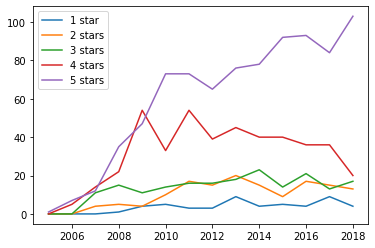

In [10]:
x_time = [val.year_only for val in df_order.select('year_only').collect()]

y_ans_val1 = [val.count_stars1 for val in df_order.select('count_stars1').collect()]

y_ans_val2 = [val.count_stars2 for val in df_order.select('count_stars2').collect()]

y_ans_val3 = [val.count_stars3 for val in df_order.select('count_stars3').collect()]

y_ans_val4 = [val.count_stars4 for val in df_order.select('count_stars4').collect()]

y_ans_val5 = [val.count_stars5 for val in df_order.select('count_stars5').collect()]

plt.plot(x_time, y_ans_val1,x_time, y_ans_val2,x_time, y_ans_val3,x_time, y_ans_val4,x_time, y_ans_val5)
plt.gca().legend(('1 star','2 stars','3 stars','4 stars','5 stars'))

plt.show()

É possível ver que existe uma tendencia nesse gráfico, porém, como ja vimos antes, a quantidade de reviews não é igual todos os anos, assim temos que normalizar os dados para podermos tirar uma melhor conclusão.

## Normalizando o gráfico

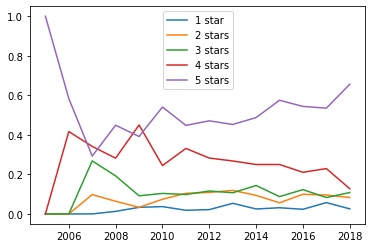

In [12]:
x_time = [val.year_only for val in df_order.select('year_only').collect()]

y_ans_val1 = [val.count_stars1/val.count_year for val in df_order.select('count_stars1','count_year').collect()]

y_ans_val2 = [val.count_stars2/val.count_year for val in df_order.select('count_stars2','count_year').collect()]

y_ans_val3 = [val.count_stars3/val.count_year for val in df_order.select('count_stars3','count_year').collect()]

y_ans_val4 = [val.count_stars4/val.count_year for val in df_order.select('count_stars4','count_year').collect()]

y_ans_val5 = [val.count_stars5/val.count_year for val in df_order.select('count_stars5','count_year').collect()]

plt.plot(x_time, y_ans_val1,x_time, y_ans_val2,x_time, y_ans_val3,x_time, y_ans_val4,x_time, y_ans_val5)
plt.gca().legend(('1 star','2 stars','3 stars','4 stars','5 stars'))

plt.show()

Agora o gráfico está normalizado para o número absoluto de reviews por ano, assim, temos uma noção melhor da diferença das quantidades dos tipos de review.